<a href="https://colab.research.google.com/github/evrimakgul/Deep_Learning/blob/master/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%tensorflow_version 2.x
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model # This will print model architecture.
from tensorflow.keras.layers import Input, Concatenate, Dense, Dropout, Flatten, Activation # We add the Concatentate function
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, SeparableConv2D # We will use AveragePooling2D. Similar to MaxPooling but now we take the average value in the window.
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend
from sklearn.model_selection import train_test_split

In [0]:
# Load the CIFAR 10 library from Keras
from tensorflow.keras.datasets import cifar10

# fix random seed for reproducibility
np.random.seed(42)

# load data
(train_images, train_labels),(test_images, test_labels) = cifar10.load_data()

In [0]:
# Reshape xblock data and normalize
train_images =  train_images.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32')/train_images.max()

test_images =  test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32')/test_images.max()

# convert to labels to categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#split into validation
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.20, random_state=42)

In [4]:
train_images.shape, train_labels.shape

((50000, 32, 32, 3), (50000, 10))

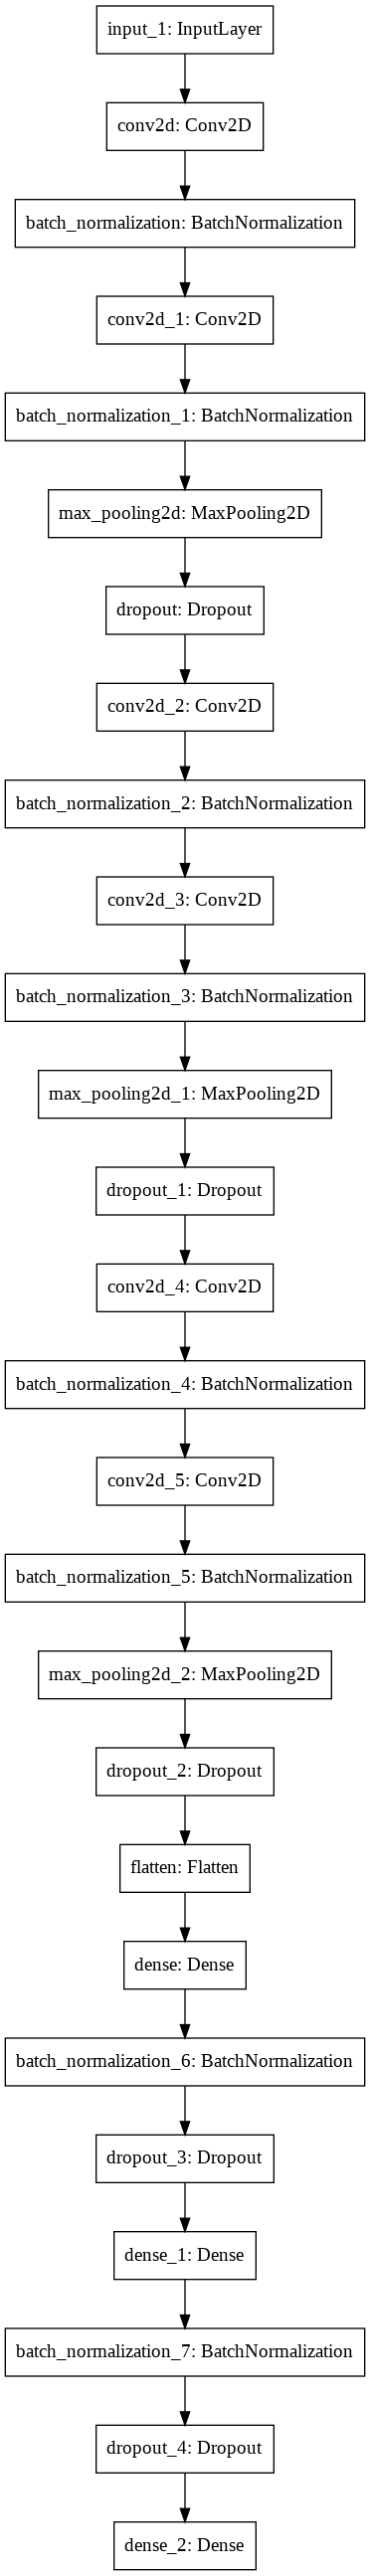

In [11]:
# Layer 1: Input Data and Convnet no Max_Pooling

input_layer = Input(shape=(32, 32, 3))

l1 = Conv2D(10, 5, padding='same', activation='relu')(input_layer)
b1 = BatchNormalization()(l1)
l2 = Conv2D(20, 3, padding='same', activation='relu')(b1)
b2 = BatchNormalization()(l2)
m1 = MaxPooling2D(2)(b2)
d1 = Dropout(0.25)(m1)

l3 = Conv2D(30, 5, padding='same', activation='relu')(d1)
b3 = BatchNormalization()(l3)
l4 = Conv2D(40, 3, padding='same', activation='relu')(b3)
b4 = BatchNormalization()(l4)
m2 = MaxPooling2D(2)(b4)
d2 = Dropout(0.25)(m2)

l5 = Conv2D(50, 5, padding='same', activation='relu')(d2)
b5 = BatchNormalization()(l5)
l6 = Conv2D(60, 3, padding='same', activation='relu')(b5)
b6 = BatchNormalization()(l6)
m3 = MaxPooling2D(2)(b6)
d3 = Dropout(0.25)(m3)

f = Flatten()(d3)

fc1 = Dense(40, activation='relu')(f)
b7 = BatchNormalization()(fc1)
d4 = Dropout(0.25)(b7)

fc2 = Dense(20, activation='relu')(d4)
b8 = BatchNormalization()(fc2)
d5 = Dropout(0.25)(b8)

output_layer = Dense(10, activation='softmax')(d5)

model = Model(input_layer, output_layer)
plot_model(model)

In [12]:
l1.shape, l2.shape, l3.shape, l4.shape, l5.shape, l6.shape, f.shape, fc1.shape, fc2.shape

(TensorShape([None, 32, 32, 10]),
 TensorShape([None, 32, 32, 20]),
 TensorShape([None, 16, 16, 30]),
 TensorShape([None, 16, 16, 40]),
 TensorShape([None, 8, 8, 50]),
 TensorShape([None, 8, 8, 60]),
 TensorShape([None, 960]),
 TensorShape([None, 40]),
 TensorShape([None, 20]))

Epoch 1/100
40/40 [==============================] - 6s 148ms/step - loss: 2.3735 - accuracy: 0.2125 - val_loss: 2.3526 - val_accuracy: 0.1017
Epoch 2/100
40/40 [==============================] - 6s 139ms/step - loss: 1.8849 - accuracy: 0.3374 - val_loss: 2.5440 - val_accuracy: 0.1040
Epoch 3/100
40/40 [==============================] - 6s 139ms/step - loss: 1.6726 - accuracy: 0.4026 - val_loss: 2.5920 - val_accuracy: 0.1686
Epoch 4/100
40/40 [==============================] - 6s 139ms/step - loss: 1.5381 - accuracy: 0.4487 - val_loss: 2.7483 - val_accuracy: 0.1629
Epoch 5/100
40/40 [==============================] - 6s 139ms/step - loss: 1.4362 - accuracy: 0.4869 - val_loss: 2.7835 - val_accuracy: 0.1595
Epoch 6/100
40/40 [==============================] - 6s 139ms/step - loss: 1.3575 - accuracy: 0.5163 - val_loss: 2.8558 - val_accuracy: 0.1519
Epoch 7/100
40/40 [==============================] - 6s 140ms/step - loss: 1.2770 - accuracy: 0.5482 - val_loss: 2.9554 - val_accuracy: 0.1812

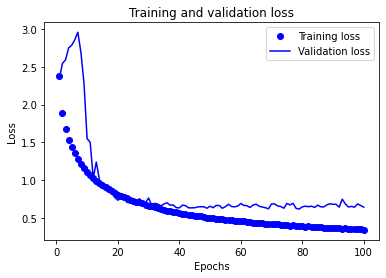

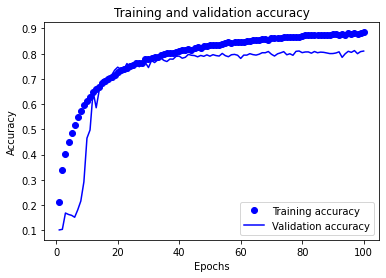

313/313 [==============================] - 2s 5ms/step - loss: 0.6666 - accuracy: 0.8044
['loss', 'accuracy']
[0.6665793061256409, 0.8044000267982483]
        loss  accuracy  val_loss  val_accuracy
95  0.357278  0.879350  0.656169        0.8053
96  0.356086  0.880650  0.646178        0.8123
97  0.358047  0.879825  0.689496        0.8000
98  0.359144  0.880625  0.666803        0.8082
99  0.345680  0.884950  0.646300        0.8104


Total amount of time to execute this process is:  577.6313843727112


In [13]:
start = time.time()

backend.clear_session()

#Compile, fit, plot, and assess in one cell.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train
                    , batch_size = 1000
                    , epochs = 100
                    , callbacks = [EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)]
                    , validation_data = (x_val, y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results = model.evaluate(test_images, test_labels)
print(model.metrics_names)
print(results)

hist = pd.DataFrame(history.history)
print(hist.tail())

end = time.time()
print("\n\nTotal amount of time to execute this process is: ", (end-start))